Implementación de Algoritmo de Aprendizaje En Secuencia:  
-  Implemente el algoritmo de aprendizaje secuencial del perceptrón y corra el mismo 
por 100 épocas. Inicializando los pesos de forma aleatoria para los tres datasets. 
En todos los casos enfóquese en medir el accuracy (es decir, el número de aciertos 
de clasificación versus el número total de eventos).  
-  Para los tres datasets recopile el accuracy por época y genere gráficos (eje equis 
el número de época y en el eje ye el valor de accuracy para esa época).  
-  Para todos los datasets dibuje el decision boundary (es decir, el hiperplano que 
divide los datos entre categoría +1 y -1. 

In [1264]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt

# Perceptron Linear

In [1265]:
# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        # Iterates through each data point in the training set one at a time for a fixed number of epochs.
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * prediction * (1 - prediction) * inputs
                self.weights[0] += self.learning_rate * error * prediction * (1 - prediction)

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(1/accuracy))


# Plot the decision boundary
def plot_decision_boundary(perceptron, training_inputs, labels):
    if perceptron.weights is None:
        print("Perceptron has not been trained.")
        return

    plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels, cmap=plt.cm.Spectral)

    # Plot the decision boundary
    x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
    y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.round(np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')
    plt.show()


# Data Set 1 - Linearly Separable

In [1266]:
x = pd.read_csv('./XY/x.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,2.822737,4.154048
1,0.741074,0.032447
2,4.794975,0.404499
3,1.672767,3.685057
4,3.571626,1.126299
...,...,...
195,3.035141,4.776586
196,4.343927,1.170200
197,3.656601,2.025832
198,4.031428,3.240811


In [1267]:
y = pd.read_csv('./XY/y.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y

,Class
0,1
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


### Plot X

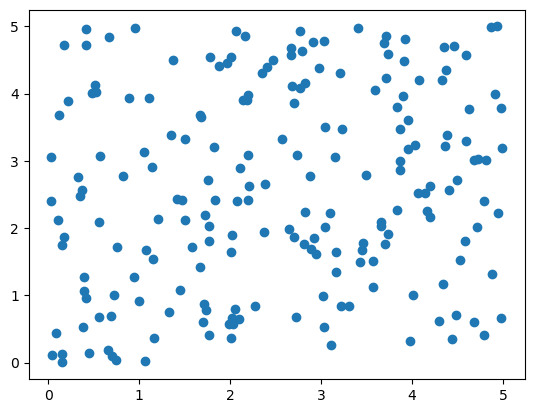

In [1268]:
plt.scatter(x['X'], x['Y'])

### Perceptron Secuencial Data Set 1

In [1269]:
# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = Perceptron(epochs=1000, learning_rate=0.01, weights=np.random.rand(3))
# data set to numpy array
training_inputs = x.to_numpy()
labels = y.to_numpy()
# train the perceptron
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 0.013333333333333334
Epoch: 1 Accuracy: 0.009411764705882352
Epoch: 2 Accuracy: 0.009389671361502348
Epoch: 3 Accuracy: 0.00954653937947494
Epoch: 4 Accuracy: 0.00966183574879227
Epoch: 5 Accuracy: 0.009732360097323601
Epoch: 6 Accuracy: 0.009779951100244499
Epoch: 7 Accuracy: 0.00980392156862745
Epoch: 8 Accuracy: 0.009779951100244499
Epoch: 9 Accuracy: 0.009779951100244499
Epoch: 10 Accuracy: 0.009828009828009828
Epoch: 11 Accuracy: 0.009828009828009828
Epoch: 12 Accuracy: 0.009828009828009828
Epoch: 13 Accuracy: 0.00980392156862745
Epoch: 14 Accuracy: 0.00980392156862745
Epoch: 15 Accuracy: 0.00980392156862745
Epoch: 16 Accuracy: 0.009779951100244499
Epoch: 17 Accuracy: 0.009779951100244499
Epoch: 18 Accuracy: 0.00975609756097561
Epoch: 19 Accuracy: 0.00975609756097561
Epoch: 20 Accuracy: 0.009732360097323601
Epoch: 21 Accuracy: 0.009732360097323601
Epoch: 22 Accuracy: 0.009732360097323601
Epoch: 23 Accuracy: 0.009685230024213076
Epoch: 24 Accuracy: 0.009685230024

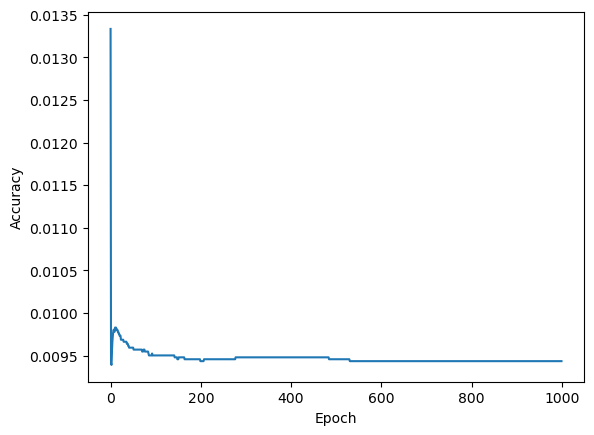

In [1270]:
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

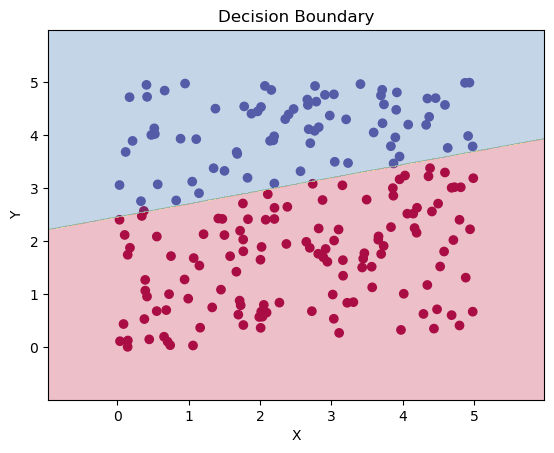

In [1271]:
plot_decision_boundary(perceptron, training_inputs, labels)

# Perceptron XOR

In [1272]:
class Perceptron:
    def __init__(self, input_size, weights=None):
        self.weights = weights
        self.bias = np.random.rand()
        self.accuracies = []

    def activate(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activate(weighted_sum)
        return output

    def train(self, training_inputs, labels, epochs, learning_rate):
        for epoch in range(epochs):
            correct_predictions = 0  # Init counter for correct predictions
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

                # Increment correct predictions counter if the prediction is correct
                if prediction == label:
                    correct_predictions += 1

            # Calculate accuracy for the current epoch
            accuracy = correct_predictions / len(labels)
            self.accuracies.append(1/accuracy)
            print(f'Época {epoch + 1}/{epochs}, Precisión: {accuracy}')




def plot_decision_boundary(model, X, y):
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([model.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)





## Data Set 3 - XOR

In [1273]:
x = pd.read_csv('./XOR/XXOR.csv', header=None)
x.columns = ['X', 'Y']

x


,X,Y
0,0.141117,0.078580
1,-0.005747,-0.039122
2,0.094092,0.040520
3,0.049805,-0.002619
4,-0.168823,-0.011247
...,...,...
95,0.935282,1.047225
96,1.093041,0.982468
97,0.857808,1.199796
98,0.914345,0.845841


In [1274]:
y = pd.read_csv('./XOR/YXOR.csv', header=None)
y.columns = ['Class']

y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


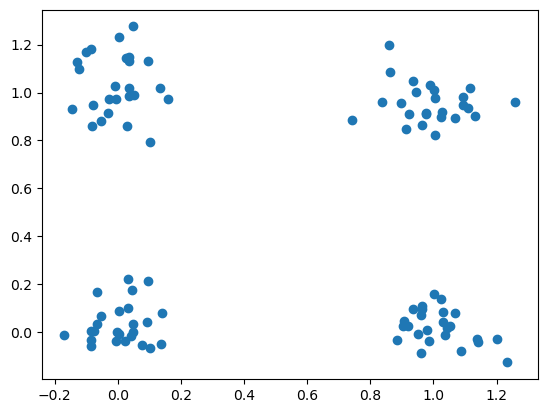

In [1275]:
plt.scatter(x['X'], x['Y'])

In [1276]:
# Transform to numpy array
training_inputs = np.array(x)
labels = np.array(y)

# Creamos un perceptrón con 2 entradas
perceptron = Perceptron(input_size=2, weights=np.random.rand(2))

# Entrenamos el perceptrón con los datos de entrenamiento
perceptron.train(training_inputs, labels, epochs=100, learning_rate=0.01)

Época 1/100, Precisión: 0.5
Época 2/100, Precisión: 0.61
Época 3/100, Precisión: 0.66
Época 4/100, Precisión: 0.75
Época 5/100, Precisión: 0.82
Época 6/100, Precisión: 0.86
Época 7/100, Precisión: 0.89
Época 8/100, Precisión: 0.91
Época 9/100, Precisión: 0.94
Época 10/100, Precisión: 0.95
Época 11/100, Precisión: 0.96
Época 12/100, Precisión: 0.95
Época 13/100, Precisión: 0.97
Época 14/100, Precisión: 0.96
Época 15/100, Precisión: 0.96
Época 16/100, Precisión: 0.96
Época 17/100, Precisión: 0.96
Época 18/100, Precisión: 0.96
Época 19/100, Precisión: 0.94
Época 20/100, Precisión: 0.94
Época 21/100, Precisión: 0.95
Época 22/100, Precisión: 0.93
Época 23/100, Precisión: 0.95
Época 24/100, Precisión: 0.95
Época 25/100, Precisión: 0.96
Época 26/100, Precisión: 0.96
Época 27/100, Precisión: 0.96
Época 28/100, Precisión: 0.95
Época 29/100, Precisión: 0.95
Época 30/100, Precisión: 0.96
Época 31/100, Precisión: 0.96
Época 32/100, Precisión: 0.96
Época 33/100, Precisión: 0.96
Época 34/100, Precis

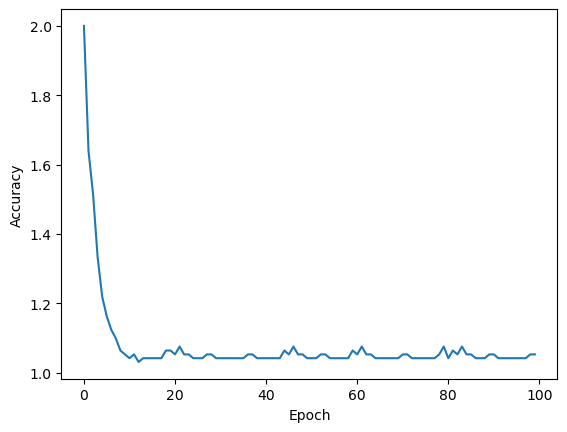

In [1277]:
# Plot the accuracies
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


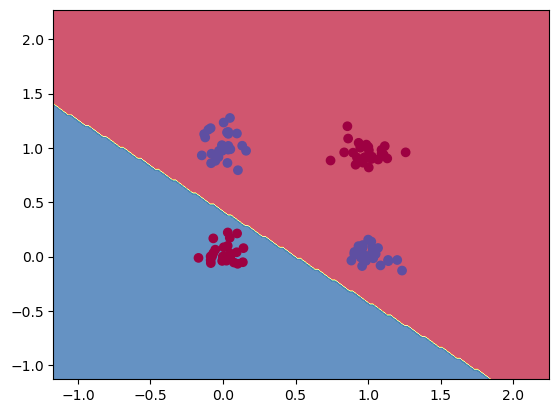

In [1278]:
plot_decision_boundary(perceptron, training_inputs, labels)

# Perceptron Non Linear

In [1279]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self,learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * inputs

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(1/accuracy))

def plot_decision_boundary(perceptron, x, y, poly):
    # Definir la malla de puntos
    x_min, x_max = x['X'].min(), x['X'].max()
    y_min, y_max = x['Y'].min(), x['Y'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Preparar datos de la malla y transformarlos a polinomial
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid_data)

    # Calcular las predicciones en la malla
    Z = perceptron.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)

    # Graficar los puntos de datos
    scatter = plt.scatter(x['X'], x['Y'], c=y['Class'], s=20, edgecolor='k', cmap=plt.cm.Spectral)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Decision Boundary')
    plt.show()


# Data set 2 - Non-linearly separable data set

In [1280]:
x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,0.064775,0.074421
1,0.325578,0.497319
2,0.081736,1.159518
3,0.053192,-0.022444
4,0.504479,0.387099
...,...,...
395,-0.308411,-2.315298
396,-2.690173,1.099032
397,-1.195448,2.093523
398,2.614705,1.642373


In [1281]:
y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
395,-1
396,-1
397,-1
398,-1


### Plot X NOT LINEARLY SEPARABLE

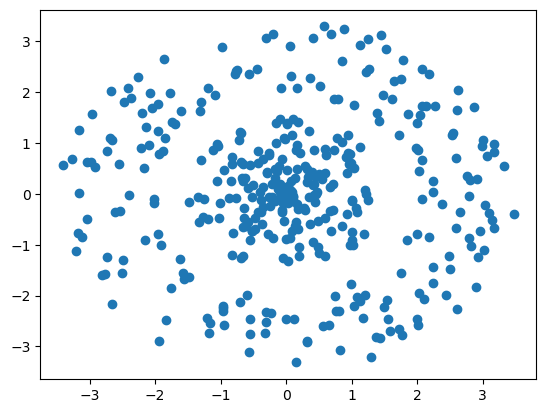

In [1282]:
plt.scatter(x['X'], x['Y'])

### Perceptron Secuencial Data Set 2

In [1283]:
# Transform the training inputs into a polynomial feature set
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)
labels = y.values
# Initialize the perceptron with the new input size
perceptron = Perceptron(epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 0.024691358024691357
Epoch: 1 Accuracy: 0.022222222222222223
Epoch: 2 Accuracy: 0.019230769230769232
Epoch: 3 Accuracy: 0.01639344262295082
Epoch: 4 Accuracy: 0.015151515151515152
Epoch: 5 Accuracy: 0.013793103448275862
Epoch: 6 Accuracy: 0.013157894736842105
Epoch: 7 Accuracy: 0.012903225806451613
Epoch: 8 Accuracy: 0.012422360248447204
Epoch: 9 Accuracy: 0.012195121951219513
Epoch: 10 Accuracy: 0.012121212121212121
Epoch: 11 Accuracy: 0.011976047904191617
Epoch: 12 Accuracy: 0.011764705882352941
Epoch: 13 Accuracy: 0.011627906976744186
Epoch: 14 Accuracy: 0.011494252873563218
Epoch: 15 Accuracy: 0.011363636363636364
Epoch: 16 Accuracy: 0.011235955056179775
Epoch: 17 Accuracy: 0.011111111111111112
Epoch: 18 Accuracy: 0.01092896174863388
Epoch: 19 Accuracy: 0.010869565217391304
Epoch: 20 Accuracy: 0.010869565217391304
Epoch: 21 Accuracy: 0.010752688172043012
Epoch: 22 Accuracy: 0.010638297872340425
Epoch: 23 Accuracy: 0.010638297872340425
Epoch: 24 Accuracy: 0.010582

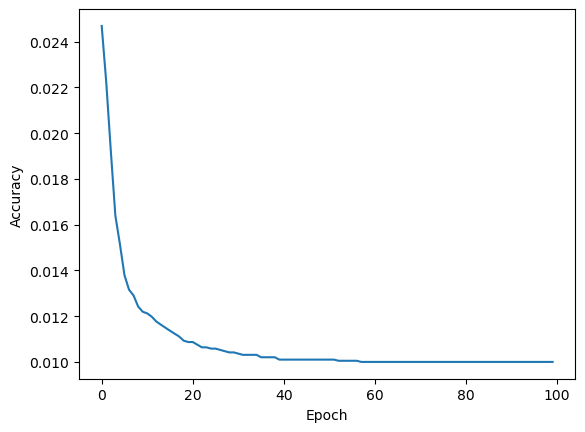

In [1284]:
# Graficar el rendimiento (accuracy) a lo largo de las épocas
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

/Users/juancisneros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


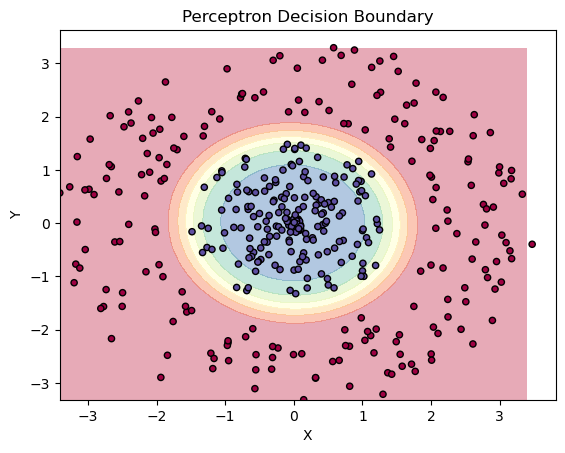

In [1285]:
plot_decision_boundary(perceptron, x, y, poly)

# Implementación de Algoritmo de Aprendizaje En Batch:  
-  Implemente el algoritmo de aprendizaje batch del perceptrón y corra el mismo por 
100 épocas. Inicializando los pesos de forma aleatoria para los tres datasets. En 
todos los casos enfóquese en medir el accuracy.  
-  Para los tres datasets recopile el accuracy por época y genere gráficos de accuracy 
versus época.  
-  Para todos los datasets dibuje el decision boundary (es decir, el hiperplano que 
divide los datos entre categoría +1 y -1.

# Perceptron Linear Batch

In [1286]:
class PerceptronBatch:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights if weights is not None else np.random.rand(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = [] 

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.sigmoid(summation)

    def calculate_accuracy(self, predictions, labels):
        thresholded_predictions = (predictions >= 0.5).astype(int)
        correct_predictions = np.sum(thresholded_predictions == labels)
        total_predictions = len(labels)
        accuracy = correct_predictions / total_predictions
        return accuracy

    def train(self, training_inputs, labels):
        # Calculates predictions for all training inputs in one go and then updates weights based on the aggregated errors for the entire dataset
        for epoch in range(self.epochs):
            predictions = self.predict(training_inputs)
            errors = labels - predictions
            self.weights[1:] += self.learning_rate * np.dot(errors * predictions * (1 - predictions), training_inputs)
            self.weights[0] += self.learning_rate * np.sum(errors * predictions * (1 - predictions))

            accuracy = self.calculate_accuracy(predictions, labels)
            self.accuracies.append(1/accuracy)

            print(f'Epoch {epoch + 1}/{self.epochs}, Accuracy: {accuracy}')

def plot_decision_boundary(perceptron, training_inputs, labels):
    if perceptron.weights is None:
        print("Perceptron has not been trained.")
        return

    plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels, cmap=plt.cm.Spectral)

    # Plot the decision boundary
    x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
    y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.round(np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')
    plt.show()

# Data Set 1 - Linearly Separable

In [1287]:
x = pd.read_csv('./XY/x.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,2.822737,4.154048
1,0.741074,0.032447
2,4.794975,0.404499
3,1.672767,3.685057
4,3.571626,1.126299
...,...,...
195,3.035141,4.776586
196,4.343927,1.170200
197,3.656601,2.025832
198,4.031428,3.240811


In [1288]:
y = pd.read_csv('./XY/y.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y


,Class
0,1
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


### Plot the data

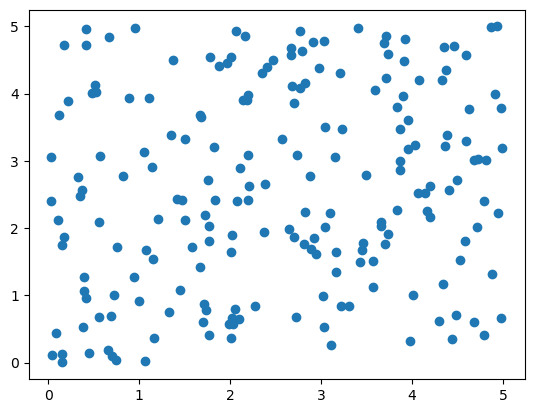

In [1289]:
plt.scatter(x['X'], x['Y'])

In [1290]:
x = x.to_numpy()
labels = y.to_numpy().flatten()

perceptron = PerceptronBatch(input_size=2, epochs=100, learning_rate=0.01, weights=np.random.rand(3))
perceptron.train(x, labels)

Epoch 1/100, Accuracy: 0.375
Epoch 2/100, Accuracy: 0.575
Epoch 3/100, Accuracy: 0.685
Epoch 4/100, Accuracy: 0.73
Epoch 5/100, Accuracy: 0.77
Epoch 6/100, Accuracy: 0.78
Epoch 7/100, Accuracy: 0.8
Epoch 8/100, Accuracy: 0.8
Epoch 9/100, Accuracy: 0.805
Epoch 10/100, Accuracy: 0.815
Epoch 11/100, Accuracy: 0.835
Epoch 12/100, Accuracy: 0.82
Epoch 13/100, Accuracy: 0.83
Epoch 14/100, Accuracy: 0.83
Epoch 15/100, Accuracy: 0.845
Epoch 16/100, Accuracy: 0.85
Epoch 17/100, Accuracy: 0.85
Epoch 18/100, Accuracy: 0.85
Epoch 19/100, Accuracy: 0.85
Epoch 20/100, Accuracy: 0.865
Epoch 21/100, Accuracy: 0.87
Epoch 22/100, Accuracy: 0.875
Epoch 23/100, Accuracy: 0.875
Epoch 24/100, Accuracy: 0.875
Epoch 25/100, Accuracy: 0.88
Epoch 26/100, Accuracy: 0.88
Epoch 27/100, Accuracy: 0.885
Epoch 28/100, Accuracy: 0.885
Epoch 29/100, Accuracy: 0.89
Epoch 30/100, Accuracy: 0.89
Epoch 31/100, Accuracy: 0.89
Epoch 32/100, Accuracy: 0.89
Epoch 33/100, Accuracy: 0.895
Epoch 34/100, Accuracy: 0.895
Epoch 35/1

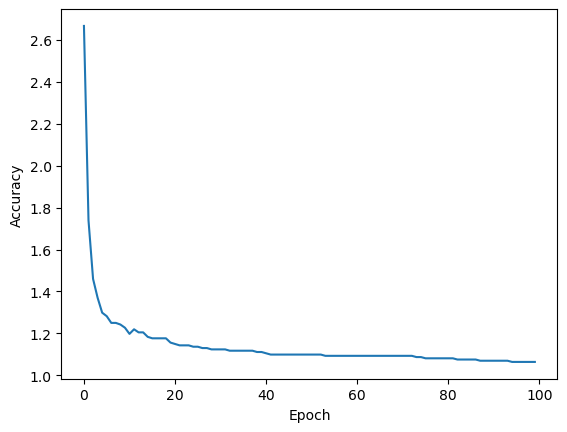

In [1291]:
# Plot the accuracies
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


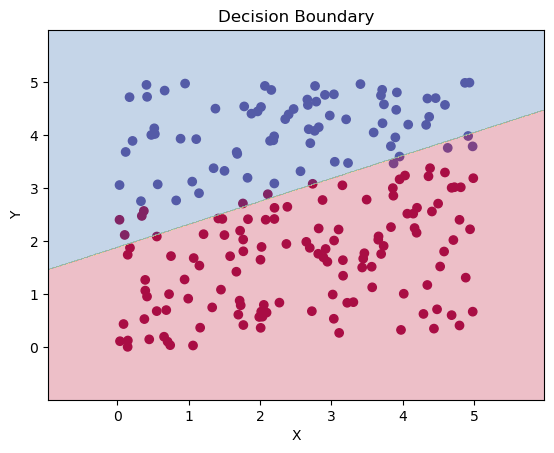

In [1292]:
# Plot the decision boundary
plot_decision_boundary(perceptron, x, labels)

# Perceptron XOR Batch

In [1293]:
class PerceptronBatch:
    def __init__(self, input_size, weights=None):
        self.weights = weights
        self.bias = np.random.rand()
        self.accuracies = []

    def activate(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activate(weighted_sum)
        return output

    def train(self, training_inputs, labels, epochs, learning_rate):
        for epoch in range(epochs):
            predictions = np.array([self.predict(inputs) for inputs in training_inputs])
            errors = labels - predictions

            # Update weights and bias using the average error over all samples
            self.weights += learning_rate * np.dot(errors, training_inputs) / len(labels)
            self.bias += learning_rate * np.sum(errors) / len(labels)

            # Calculate accuracy for the current epoch
            accuracy = np.mean(predictions == labels)
            self.accuracies.append(1/accuracy)
            print(f'Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy}')


def plot_decision_boundary(model, X, y):
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([model.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)





In [1294]:
x = pd.read_csv('./XOR/XXOR.csv', header=None)
x.columns = ['X', 'Y']

x

,X,Y
0,0.141117,0.078580
1,-0.005747,-0.039122
2,0.094092,0.040520
3,0.049805,-0.002619
4,-0.168823,-0.011247
...,...,...
95,0.935282,1.047225
96,1.093041,0.982468
97,0.857808,1.199796
98,0.914345,0.845841


In [1295]:
y = pd.read_csv('./XOR/YXOR.csv', header=None)
y.columns = ['Class']

y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


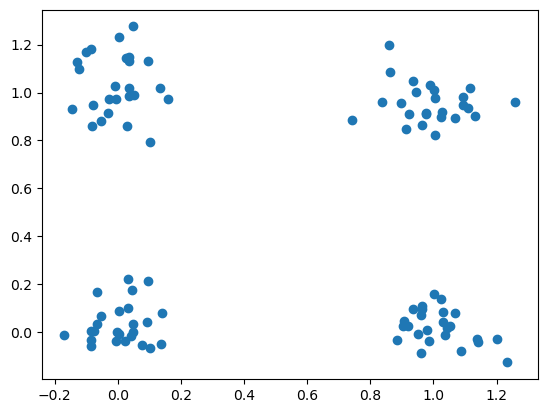

In [1296]:
# Plot the data
plt.scatter(x['X'], x['Y'])

In [1297]:
# Transform to numpy array
training_inputs = np.array(x)
labels = np.array(y).flatten()
# Perceptron with 2 inputs
perceptron = PerceptronBatch(input_size=2, weights=np.random.rand(2))

# Train the perceptron with the training data
perceptron.train(training_inputs, labels, epochs=100, learning_rate=0.01)


Epoch 1/100, Accuracy: 0.5
Epoch 2/100, Accuracy: 0.5
Epoch 3/100, Accuracy: 0.5
Epoch 4/100, Accuracy: 0.5
Epoch 5/100, Accuracy: 0.5
Epoch 6/100, Accuracy: 0.5
Epoch 7/100, Accuracy: 0.5
Epoch 8/100, Accuracy: 0.5
Epoch 9/100, Accuracy: 0.5
Epoch 10/100, Accuracy: 0.5
Epoch 11/100, Accuracy: 0.5
Epoch 12/100, Accuracy: 0.5
Epoch 13/100, Accuracy: 0.5
Epoch 14/100, Accuracy: 0.5
Epoch 15/100, Accuracy: 0.5
Epoch 16/100, Accuracy: 0.5
Epoch 17/100, Accuracy: 0.5
Epoch 18/100, Accuracy: 0.5
Epoch 19/100, Accuracy: 0.5
Epoch 20/100, Accuracy: 0.5
Epoch 21/100, Accuracy: 0.5
Epoch 22/100, Accuracy: 0.5
Epoch 23/100, Accuracy: 0.5
Epoch 24/100, Accuracy: 0.5
Epoch 25/100, Accuracy: 0.5
Epoch 26/100, Accuracy: 0.5
Epoch 27/100, Accuracy: 0.5
Epoch 28/100, Accuracy: 0.5
Epoch 29/100, Accuracy: 0.5
Epoch 30/100, Accuracy: 0.5
Epoch 31/100, Accuracy: 0.5
Epoch 32/100, Accuracy: 0.5
Epoch 33/100, Accuracy: 0.5
Epoch 34/100, Accuracy: 0.5
Epoch 35/100, Accuracy: 0.5
Epoch 36/100, Accuracy: 0.5
E

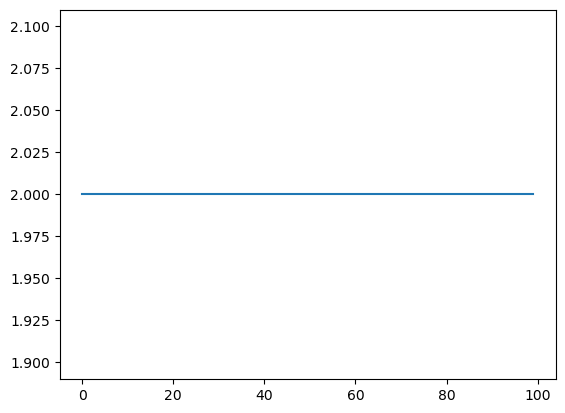

In [1298]:
# Plot the accuracies
plt.plot(perceptron.accuracies)

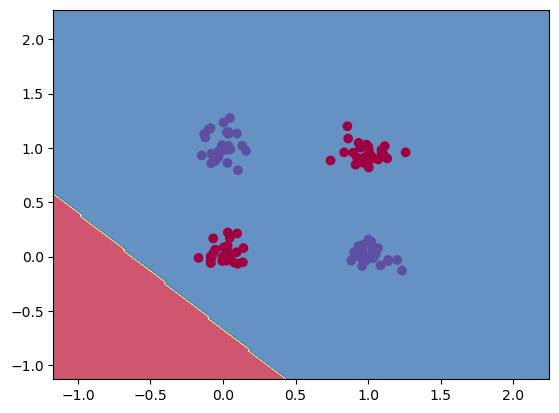

In [1299]:
# Plot the decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)

# Perceptron No Lineal Batch

In [1300]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronBatch:
    def __init__(self,learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * inputs

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(1/accuracy))

def plot_decision_boundary(perceptron, x, y, poly):
    # Definir la malla de puntos
    x_min, x_max = x['X'].min(), x['X'].max()
    y_min, y_max = x['Y'].min(), x['Y'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Preparar datos de la malla y transformarlos a polinomial
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid_data)

    # Calcular las predicciones en la malla
    Z = perceptron.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)

    # Graficar los puntos de datos
    scatter = plt.scatter(x['X'], x['Y'], c=y['Class'], s=20, edgecolor='k', cmap=plt.cm.Spectral)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Decision Boundary')
    plt.show()


def plot_decision_boundary(perceptron, x, y, poly):
    # Definir la malla de puntos
    x_min, x_max = x['X'].min(), x['X'].max()
    y_min, y_max = x['Y'].min(), x['Y'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Preparar datos de la malla y transformarlos a polinomial
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid_data)

    # Calcular las predicciones en la malla
    Z = perceptron.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)

    # Graficar los puntos de datos
    scatter = plt.scatter(x['X'], x['Y'], c=y['Class'], s=20, edgecolor='k', cmap=plt.cm.Spectral)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Decision Boundary')
    plt.show()


In [1301]:
x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,0.064775,0.074421
1,0.325578,0.497319
2,0.081736,1.159518
3,0.053192,-0.022444
4,0.504479,0.387099
...,...,...
395,-0.308411,-2.315298
396,-2.690173,1.099032
397,-1.195448,2.093523
398,2.614705,1.642373


In [1302]:
y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y


,Class
0,1
1,1
2,1
3,1
4,1
...,...
395,-1
396,-1
397,-1
398,-1


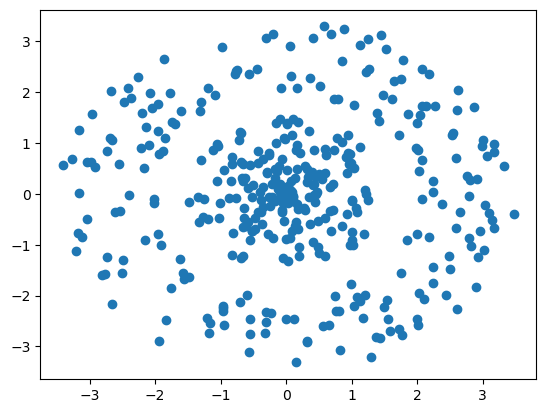

In [1303]:
# Plot the data
plt.scatter(x['X'], x['Y'])

In [1304]:
# Transform the training inputs into a polynomial feature set
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)
labels = y.values
# Initialize the perceptron with the new input size
perceptron = PerceptronBatch(epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 0.015151515151515152
Epoch: 1 Accuracy: 0.018018018018018018
Epoch: 2 Accuracy: 0.01680672268907563
Epoch: 3 Accuracy: 0.014705882352941176
Epoch: 4 Accuracy: 0.013513513513513514
Epoch: 5 Accuracy: 0.013245033112582781
Epoch: 6 Accuracy: 0.012658227848101266
Epoch: 7 Accuracy: 0.012422360248447204
Epoch: 8 Accuracy: 0.012048192771084338
Epoch: 9 Accuracy: 0.011976047904191617
Epoch: 10 Accuracy: 0.011834319526627219
Epoch: 11 Accuracy: 0.011764705882352941
Epoch: 12 Accuracy: 0.011695906432748537
Epoch: 13 Accuracy: 0.011428571428571429
Epoch: 14 Accuracy: 0.011428571428571429
Epoch: 15 Accuracy: 0.011299435028248588
Epoch: 16 Accuracy: 0.011235955056179775
Epoch: 17 Accuracy: 0.011111111111111112
Epoch: 18 Accuracy: 0.011049723756906077
Epoch: 19 Accuracy: 0.010810810810810811
Epoch: 20 Accuracy: 0.010810810810810811
Epoch: 21 Accuracy: 0.0106951871657754
Epoch: 22 Accuracy: 0.010638297872340425
Epoch: 23 Accuracy: 0.010582010582010581
Epoch: 24 Accuracy: 0.0105263

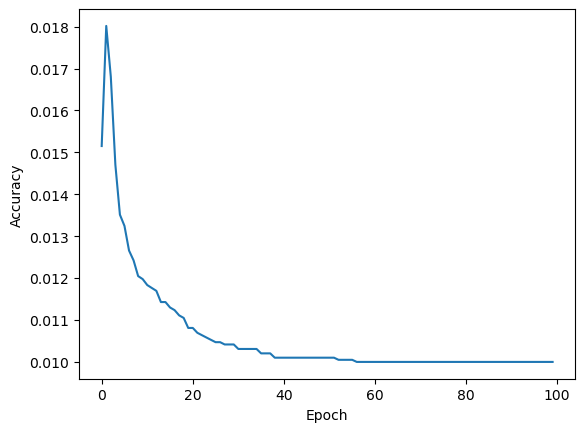

In [1305]:
# Graficar el rendimiento (accuracy) a lo largo de las épocas
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()